In [110]:
import numpy as np
from tensorflow import lite

from PIL import Image

In [70]:
import pandas as pd

In [71]:
test_images = pd.read_csv('test.csv')

In [72]:
test_img = test_images.Id[0]

In [114]:
with Image.open(f'images/{str(test_img).rjust(4, "0")}.jpg') as image:
    img = img.resize((256, 256), Image.NEAREST)

/tmp/ipykernel_1557/370119196.py:2: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  img = img.resize((256, 256), Image.NEAREST)


In [123]:
X = np.array(img, dtype=np.float32)

In [118]:
interpreter = lite.Interpreter('xception_model_v1.tflite')
interpreter.allocate_tensors()

In [119]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [120]:
# Test the model on random input data.
input_shape = input_details[0]['shape']
input_data = X
interpreter.set_tensor(input_details[0]['index'], [input_data])

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

[[0.06133067 0.19582213 0.21565588 0.15344203 0.04071004 0.33303922]]


In [100]:
dataset = keras.preprocessing.image_dataset_from_directory(
    'images_by_class/train/',
    batch_size=None, 
    image_size=(256, 256)
)

Found 5559 files belonging to 6 classes.


In [106]:
dict(zip(dataset.class_names, output_data[0]))

{'cup': 0.06133067,
 'fork': 0.19582213,
 'glass': 0.21565588,
 'knife': 0.15344203,
 'plate': 0.040710043,
 'spoon': 0.33303922}

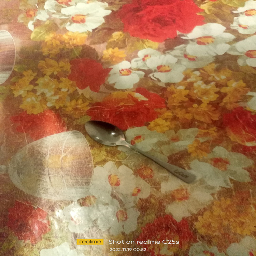

In [108]:
img